# Análise Exploratória de Dados

## 0. Setup

**Importações**

In [1]:
import os, random
import pandas as pd, numpy as np    # manipulação de dados
import matplotlib.pyplot as plt     # gráficos
import seaborn as sns
from PIL import Image, ImageOps     # leitura de imagens
from tqdm import tqdm               # barras de progresso
from google.colab import drive

Definição de semente fixa para gerar resultados reproduzíveis

In [ ]:
SEED = 42
random.seed(SEED); np.random.seed(SEED)

Definições Visuais

In [ ]:
plt.rcParams.update({"figure.dpi": 150, "savefig.dpi": 300})

**Estruturas de Pastas**

- `figures/` → onde os gráficos serão salvos (`.png`)
- `reports/` → para armazenar tabelas, splits e artefatos (`.csv`, `.json`)

In [ ]:
os.makedirs("figures", exist_ok=True)
os.makedirs("reports", exist_ok=True)

**Carregamento do Dataset**

In [2]:
METADATA_PATH = "/content/drive/MyDrive/Colab Notebooks/UFES Pós IA CD/10. TCC/Dataset PAD-UFES-20/"
DATA_PATH = METADATA_PATH + "images/"

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
metadata = pd.read_csv(METADATA_PATH + "metadata.csv")
df = metadata.copy()

In [ ]:
TARGET = "diagnostic"                   # classes
PID, LID = "patient_id", "lesion_id"    # chaves de agrupamento (evitar vazamento entre splits)

### Um Exemplo

In [ ]:
metadata

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [ ]:
image_name = DATA_PATH + metadata.sample(1).img_id.iloc[0]

In [ ]:
image_name

'/content/drive/MyDrive/Colab Notebooks/UFES Pós IA CD/10. TCC/Dataset PAD-UFES-20/images/PAT_1186_680_578.png'

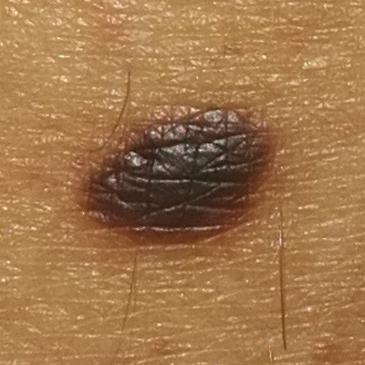

In [ ]:
img = Image.open(image_name)
display(img)

## 1. Entendimento da Variável Alvo

### 1.1. Frequência e Proporção por Classe

#### Proporções por Classe

,diagnostic,count,percent
0,BCC,845,36.77
1,ACK,730,31.77
2,NEV,244,10.62
3,SEK,235,10.23
4,SCC,192,8.36
5,MEL,52,2.26


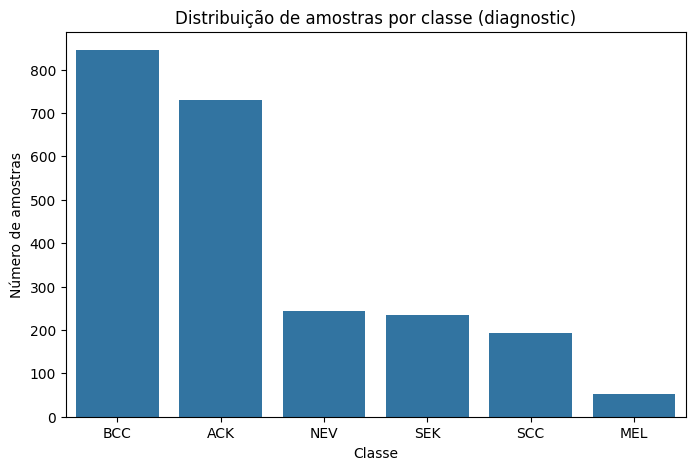

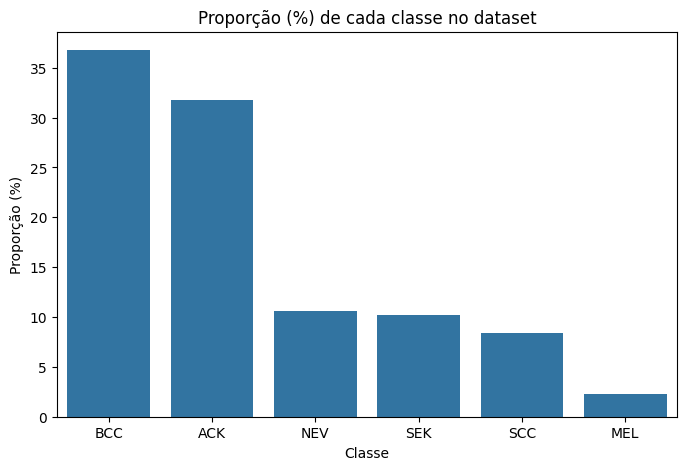

In [16]:
# ler metadados
metadata = pd.read_csv(METADATA_PATH + "metadata.csv")

# cálculo contagem e proporção por classe
class_counts = metadata['diagnostic'].value_counts().reset_index()
class_counts.columns = ['diagnostic', 'count']
class_counts['percent'] = (class_counts['count'] / class_counts['count'].sum() * 100).round(2)

# exibir tabela ordenada
display(class_counts)
print("\n")

# gráfico de barras ordenado
plt.figure(figsize=(8, 5))
sns.barplot(
    data = class_counts,
    x = 'diagnostic',
    y = 'count',
    order = class_counts.sort_values('count', ascending = False)['diagnostic']
)
plt.title("Distribuição de amostras por classe (diagnostic)")
plt.ylabel("Número de amostras")
plt.xlabel("Classe")
plt.show()

# Gráfico de Proporções
plt.figure(figsize=(8, 5))
sns.barplot(
    data = class_counts,
    x = 'diagnostic',
    y = 'percent',
    order = class_counts.sort_values('count', ascending = False)['diagnostic']
)
plt.title("Proporção (%) de cada classe no dataset")
plt.ylabel("Proporção (%)")
plt.xlabel("Classe")
plt.show()

#### Relação Câncer x Doença Maligna

As classes podem ser divididas entre dois grupos: câncer de pele e doenças de pele.

Os cancêr de pele são Basal Cell Carcinoma (BCC), Melanoma (MEL) e Squamous Cell Carcinoma (SCC). E as doenças de pele são Actinic Keratosis (ACK), Nevus (NEV) e Seborrheic Keratosis (SEK).

In [17]:
metadata['diagnostic_group'] = metadata['diagnostic'].apply(
    lambda x: 'Cancer' if x in ['BCC', 'MEL', 'SCC'] else 'Benign'
)
metadata['diagnostic_group'].value_counts(normalize=True).round(3)

,proportion
diagnostic_group,
Benign,0.526
Cancer,0.474


A base de dados está praticamente balaceada entre malignos (47,4%) e benignos (52,6%), então o modelo não terá viés estrutural binário. Porém, o desbalanceamento real está intra-grupo.

#### Avaliação de Raridade Extrema (Cauda Longa)

Gráfico de Pareto para acumulação de Amostras

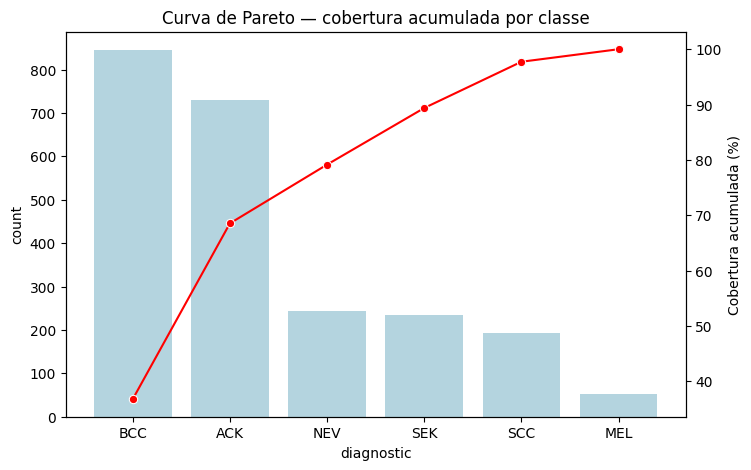

In [19]:
class_counts['cum_percent'] = class_counts['count'].cumsum() / class_counts['count'].sum() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x='diagnostic', y='count', data=class_counts, color='lightblue')
plt.twinx()
sns.lineplot(x='diagnostic', y='cum_percent', data=class_counts, color='red', marker='o')
plt.title("Curva de Pareto — cobertura acumulada por classe")
plt.ylabel("Cobertura acumulada (%)")
plt.show()

As 2 maiores classes (BCC e ACK) somam quase 70% das amostras, havendo um forte desbalanceamento. Enquanto que as classes menores MEL (2%) e SCC (8%) formam a cauda longa que exigirá atenção no treino (ex.: `class_weight`, oversampling)

#### Relação `diagnostic` x `biopsed`



In [20]:
biopsy_check = metadata.groupby('diagnostic')['biopsed'].mean().sort_values(ascending=False)
display(biopsy_check)


,biopsed
diagnostic,
BCC,1.000000
MEL,1.000000
SCC,1.000000
NEV,0.245902
ACK,0.243836
SEK,0.063830


 100% das condições malignas validadas por biópsia e cerca de 6-25% das benignas validas.

### 1.2. Amostras por Paciente

In [ ]:
# contar imagens e lesões por paciente
# imgs_por_paciente = metadados

**Passo a passo:**

- Frequência e proporção por classe (diagnostic).
  - Amostras por classe
    - dica de gráfico: gráfico de barras com a distribuição de classes
        - Amostras por paciente (para evitar leakage).
    - dica de gráfico: faça uma tabela com uma amostra de cada classe de lesão (tipo, se tiver 20 classes, mostra uma tabela 4x5)

---

  Objetivo: entender distribuição de classes e o risco de vazamento por paciente/lesão.


1. **Frequência e proporção por classe**

- O que: tabela com count e % por diagnostic.

- Gráfico: barra ordenada (contagem e % lado a lado ou dois gráficos).

- Checklist: classes raras (ex.: MEL costuma ser minoria), identifique “top 2” vs “cauda longa”.

2. **Amostras por paciente (evitar leakage)**

- O que: para cada patient_id, liste quantas lesões (lesion_id únicos) e quantas imagens tem.

- Gráficos:

  - histograma #imagens por paciente;

  - histograma #imagens por lesão.

- Checklist: pacientes com muitas imagens de uma mesma lesão → risco de overfitting se splitado por imagem.

3. **Tabela de referência visual por classe**

- O que: crie uma tabela 4×5 (ou o grid que couber) com 1 imagem por classe (representativa e não extrema).

- Checklist: registre img_id e region dessas amostras (útil para reproduzir a figura no texto).

---

Saídas: gráficos de distribuição por classe, histogramas por paciente/lesão, grid visual 1-amostra-por-classe e um parágrafo sobre desequilíbrio observado.

### 1.2. Amostras por Paciente

(evitar leakage)

In [ ]:
# quantas imagens por paciente? e classes por paciente?
imgs_per_patient = df.groupby(PID)["img_id"].nunique().describe()
print("Imagens por paciente (descrição):\n", imgs_per_patient)

# pacientes que aparecem com múltiplas classes (sinaliza risco em split errado)
cls_per_patient = df.groupby(PID)[TARGET].nunique().value_counts().sort_index()
print("\nQuantidade de classes diferentes por paciente:\n", cls_per_patient)


Imagens por paciente (descrição):
 count    1373.000000
mean        1.673707
std         1.115038
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: img_id, dtype: float64

Quantidade de classes diferentes por paciente:
 diagnostic
1    1194
2     166
3      10
4       3
Name: count, dtype: int64


### 1.3. Tabela de “uma amostra por classe” (grade 3×N)

In [ ]:
def img_path(img_id): return os.path.join(DATA_PATH, f"{img_id}.png")

# pega 1 img por classe (se quiser mais, aumente n_per_class)
n_per_class = 1
sample_rows = (df.groupby(TARGET, group_keys=False)
                 .apply(lambda g: g.sample(min(n_per_class, len(g)), random_state=SEED))
                 .reset_index(drop=True))
display(sample_rows[[TARGET,"img_id"]])

def show_grid(rows, ncols=5, fname="figures/01_sample_per_class.png"):
    ids = rows["img_id"].tolist()
    titles = rows[TARGET].tolist()
    n = len(ids); nrows = int(np.ceil(n/ncols))
    plt.figure(figsize=(ncols*2.2, nrows*2.2))
    for i,(iid,ttl) in enumerate(zip(ids,titles), start=1):
        try:
            im = Image.open(img_path(iid))
            plt.subplot(nrows, ncols, i)
            plt.imshow(im); plt.axis("off"); plt.title(ttl, fontsize=9)
        except Exception:
            pass
    plt.tight_layout(); plt.savefig(fname)

show_grid(sample_rows, ncols=5)


/tmp/ipython-input-2815499739.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(n_per_class, len(g)), random_state=SEED))


,diagnostic,img_id
0,ACK,PAT_2128_4676_965.png
1,BCC,PAT_896_1705_582.png
2,MEL,PAT_717_1347_899.png
3,NEV,PAT_1333_1177_261.png
4,SCC,PAT_319_680_166.png
5,SEK,PAT_1286_999_824.png


<Figure size 1650x660 with 0 Axes>

## 2. Estrutura das Imagens

 - Tamanhos e resoluções (faixa, mediana, outliers).
    - você pode fazer um histograma com a distribuição de área total das imagens, ou dividir elas em pequenas, médias e grandes, e fazer um gráfico barra
    - Formato de cor (RGB vs escala de cinza).
       -  (acho que todas são coloridas, ou não?)
    - Verificar imagens corrompidas/ruins.
       -  (não sei se precisa, avaliar se tem imagens ruins mesmo)  
    - Escolher resolução padrão (ex.: 224x224, 299x299).

---

Objetivo: conhecer tamanhos, formatos, problemas de qualidade e decidir a resolução-padrão.

1. **Tamanhos e resoluções**

- O que: para cada imagem, extraia (largura, altura, área) e aspect ratio.

- Gráficos:

  - histograma de área (ou “pequena/média/grande” por tercis);

  - scatter largura vs altura (pontos semi-transparentes para ver concentração);

  - boxplot da menor dimensão (útil para decidir o menor lado alvo).

- Checklist: outliers (resoluções minúsculas ou gigantes), variedade de aspect ratios (relevante p/ crop vs pad).

2. **Formato de cor**

- O que: conte imagens RGB vs 1 canal; confirme se há algum grayscale real.

- Checklist: se houver grayscale, decidir como tratar no pipeline RGB (replicar canal) e no pipeline em tons de cinza (conversão consistente).

3. **Integridade/qualidade**

- O que: arquivo corrompido (falha ao abrir), imagens duplicadas (hash), dimensões 0, EXIF bizarro.

- Opcional: heurísticas de qualidade — foco (variância do Laplaciano), brilho (média), saturação (média do S).

- Gráficos: histograma de foco/brilho para flaggar caudas.

- Checklist: decidir regra de descarte/flag (ex.: não descartar, mas marcar “low-quality=true” para análise posterior).

4. **Escolha da resolução-padrão**

- Procedimento:

  - Olhe a distribuição da menor dimensão. Se 75% ≥ 256 px, 224×224 é seguro; se muitos < 256 mas > 160, considere 192/224; se maioria confortável, pode avaliar 299.

  - Aspect ratio: escolha resize do menor lado + center-crop ou letterbox (pad). Para CNNs padrão (ImageNet), resize+crop é o mais comum; se lesão estiver frequentemente fora do centro, prefira random-resized-crop no treino.

- Checklist: registre a decisão (p.ex., “menor lado 256, crop 224, manter 3 canais ou converter para 1 canal no experimento grayscale”).

---

Saídas: gráficos de tamanho/área, tabela de integridade/duplicatas, decisão de resolução com justificativa em 3–5 linhas.

Tamanho, cor, integridade, ...

### 2.1. Tamanhos e resoluções

(área + faixas S/M/G)

Lendo dimensões: 100%|██████████| 2298/2298 [00:00<00:00, 2526.82it/s]


,W,H,AREA
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


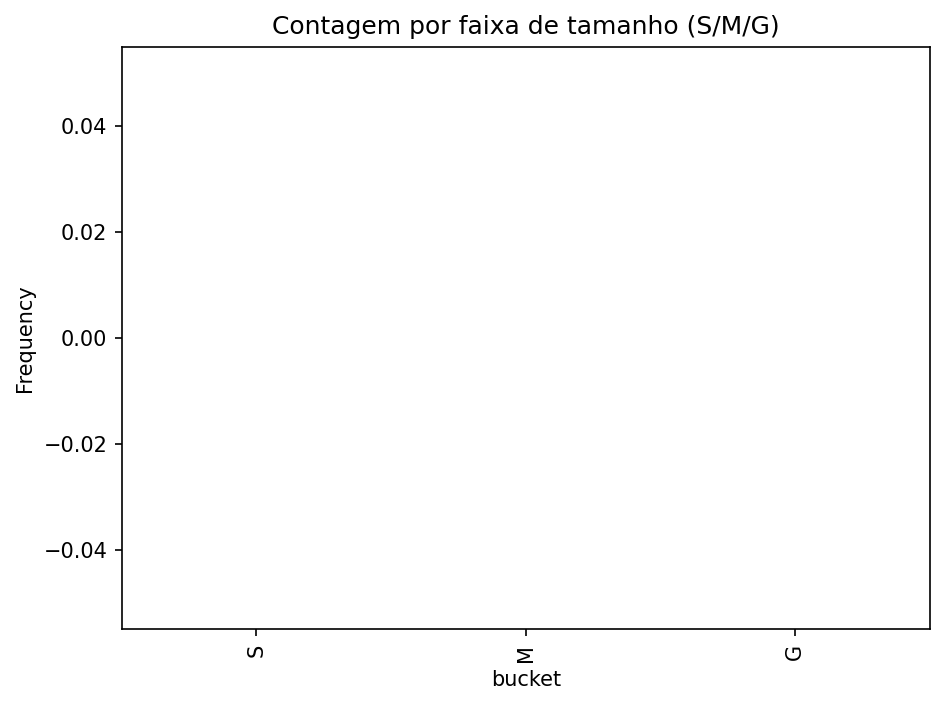

In [ ]:
dims = []
for iid in tqdm(df["img_id"], desc="Lendo dimensões"):
    p = img_path(iid)
    try:
        with Image.open(p) as im:
            w,h = im.size
            dims.append((w,h,w*h))
    except Exception:
        dims.append((np.nan,np.nan,np.nan))

dims_df = pd.DataFrame(dims, columns=["W","H","AREA"]).dropna()
display(dims_df.describe(percentiles=[.25,.5,.75]))

# histograma da área
plt.figure()
dims_df["AREA"].plot(kind="hist", bins=30)
plt.title("Distribuição da área (px²)")
plt.xlabel("área em pixels^2")
plt.tight_layout(); plt.savefig("figures/02_area_hist.png")

# bucketização S/M/G por tercis de área (ajuste se preferir limiares manuais)
q1, q2 = dims_df["AREA"].quantile([.33,.66])
def bucket(a):
    return "S" if a<=q1 else ("M" if a<=q2 else "G")
dims_df["bucket"] = dims_df["AREA"].apply(bucket)
dims_df["bucket"].value_counts().reindex(["S","M","G"]).plot(kind="bar")
plt.title("Contagem por faixa de tamanho (S/M/G)")
plt.tight_layout(); plt.savefig("figures/02_bucket_bar.png")


### 2.2. Formato de cor (RGB vs escala de cinza)

### 2.3. Verificação de corrompidas/ilegíveis

### 2.4. Escolha de resolução padrão (224 ou 299?)

## 3. Balanceamento, Normalização e Augmentação

 - Há desequilíbrio forte entre classes?
    - Definir augmentação com base nas imperfeições reais:
        - flip horizontal/vertical (avaliar sentido clínico),
        leve rotation, crop, lighting jitter controlado,
        blur moderado se houver desfoque real.
    - Evitar augmentação artificial exagerada (distorta padrão clínico).
    - dica de gráfico: mostrar umas imagens aumentadas, pra mostrar o que o augmentation fez

  ---

  Objetivo: definir como mitigar desbalanceamento e qual augmentação é realista.

1. **Desbalanceamento**

- O que: curva de Pareto das classes; tabela com baseline “acurácia sempre-classe-majoritária” e acurácia balanceada teórica se previsse ao acaso por proporções.

- Decisões:

  - Ponderação de perda (inverse freq) como default;

  - Oversampling de classes raras no DataLoader ou class-balanced sampler;

  - Evite heavy oversampling de MEL se muito escasso; combine com aug fraca-moderada.

2. **Normalização**

- RGB: calcule média/desvio por canal no treino (após resize), documente.

- Grayscale: calcule média/desvio únicos (ou use [0.5, 0.5, 0.5] ao replicar canal, mas registre a opção).

3. **Augmentação alinhada ao dado**

- Base segura:

  - flip horizontal (avaliar implicações de lateralidade anatômica; em geral ok);

  - rotação pequena (±10–15°);

  - random-resized-crop (zoom levemente > 1, p.ex. scale [0.9, 1.1]);

  - jitter leve (brilho/contraste 0.1–0.2);

  - blur leve (p≈0.1) se há desfoque no real.

- Evitar: distorções geométricas fortes, hue shifts agressivos, cortes que removam a lesão.

- Gráfico sugerido: grid 3×4 com 3–4 imagens originais e suas versões aumentadas (mesmos parâmetros que serão usados no treino).

---

Saídas: plano de balanceamento (loss weights/oversampling), estatísticas de normalização, grid de augmentations e uma nota de “o que ficou de fora e por quê”.

### 3.1 Desbalanceamento forte?

### 3.2. Normalização alvo (ImageNet) e esquema de augmentação

## 4. Particionamento

- Garantir split por paciente, não por imagem.
    - Train/val/test estratificado por paciente.
    - Teste totalmente separado e estável desde o início.
        - apresentar gráfico ou tabela provando que seus conjuntos de split estão balanceados por classe

  ---

Objetivo: splits reprodutíveis, sem vazamento e com equilíbrio razoável.

1. **Unidade de split**

- Regra: todas as imagens do mesmo patient_id ficam no mesmo conjunto.

- Se um paciente tem múltiplas lesões com rótulos distintos, ainda assim agrupe por paciente (é o mais conservador contra vazamento). Registre essa decisão.

2. **Estratificação por classe (nível paciente)**

- Procedimento:

  - Agregue por patient_id → defina um rótulo de estratificação: pode ser “classe principal” (a classe mais frequente do paciente) ou vetor multi-hot (quando possível usar métodos estratificados multi-rótulo).

  - Faça train/val/test (ex.: 70/15/15) estratificado por paciente.

  - Fixe seeds e salve os IDs dos pacientes por split (artefato versionado).

3. **Teste estável desde o início**

- Congele test na primeira execução e nunca o toque. Use só train/val para iteração.

4. **Provas de equilíbrio e de não-vazamento**

- Tabelas:

  - Distribuição de classes por split (contagem e %).

  - Distribuição de biopsed por split.

  - Faixa etária e region por split (opcional, para mostrar comparabilidade).

- Checks automáticos:

  - Interseção de patient_id entre splits = ∅.

  - Interseção de lesion_id entre splits = ∅ (opcional e desejável).

  - Para cada classe, diferença absoluta de proporção entre splits ≤ limite (ex.: 3–5 p.p.). Se exceder, refaça amostragem estratificada.

Saídas: arquivos splits/ com patients_train.txt, patients_val.txt, patients_test.txt; tabelas/gráficos de equilíbrio; checklist de vazamento zerado.